# <a id = 'section1'> 6. Modelling with various ML models </font> </a>

### 6.1 Ridge Regressor 

### Baseline Ridge Model

In [66]:
ridge_model = Ridge(solver = "lsqr", fit_intercept=False)
ridge_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [67]:
preds = np.expm1(ridge_model.predict(x_test))
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(ridge_model.predict(x_train))))
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , preds),'\n')

Train RMSLE =  2.010195380114417
Test RMSLE =  1.9425835571023635 



#### With Baseline Ridge model we got an RMSE of 1.99 & 1.93 respectively 

### Hyperparamter tuning

In [68]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000,10000],
              'fit_intercept' : [False],
              'solver' : ['lsqr']}

gs_ridge = GridSearchCV(estimator = Ridge(),
                        param_grid = parameters,
                        cv = 3, 
                        scoring = 'neg_mean_squared_error',
                        verbose = 10,
                        return_train_score = True,
                        n_jobs = 8)
gs_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done  12 out of  24 | elapsed:   12.1s remaining:   12.1s
[Parallel(n_jobs=8)]: Done  15 out of  24 | elapsed:   12.3s remaining:    7.4s
[Parallel(n_jobs=8)]: Done  18 out of  24 | elapsed:   16.2s remaining:    5.4s
[Parallel(n_jobs=8)]: Done  21 out of  24 | elapsed:   16.6s remaining:    2.4s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   16.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   16.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'fit_intercept': [False], 'solver': ['lsqr']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=10)

In [69]:
print("Best Estimator ",gs_ridge.best_estimator_)

Best Estimator  Ridge(alpha=10000, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)


#### Re-training model with Hyperparameters

In [70]:
ridge_model = Ridge(solver = "lsqr", fit_intercept=False,alpha = 10000)
ridge_model.fit(x_train, y_train)

Ridge(alpha=10000, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [71]:
preds = np.expm1(ridge_model.predict(x_test))
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(ridge_model.predict(x_train))))
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , preds),'\n')

Train RMSLE =  2.01019538011444
Test RMSLE =  1.9425835571774137 



#### The Train & Test RMSLE are almost same even with the tuned hyperparameters

### 6.2 Linear Regression Model

### Baseline Linear Regression Model

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False, copy_X=True)  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [73]:
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(regressor.predict(x_train))))

Train RMSLE =  1.9063233366453975


In [74]:
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , np.expm1(regressor.predict(x_test))))

Test RMSLE =  1.8749439725633266


#### For Baseline Linear Regression Model the Train RMSLE is 1.89 & Test RMSLE is 1.86

### HyperParameter Tuned Linear Regression Model

In [75]:
regressor = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=8)  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=True)

In [76]:
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(regressor.predict(x_train))))

Train RMSLE =  1.9063233366454237


In [77]:
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , np.expm1(regressor.predict(x_test))))

Test RMSLE =  1.87494397518205


#### The Train & Test RMSLE are same for even the Hyperparameter Tuned model being 1.89 & 1.86 respectivrly.

### 6.3 LBGM Model

### Baseline LGBM Model

In [78]:
import lightgbm as lgbm
from sklearn.model_selection import KFold

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "max_depth": 5, 
    "num_leaves": 600,
    "learning_rate": 0.01,
    "reg_lambda": 2,
    "metric": "rmse",
}

In [79]:
# noting down categorical features - will be used in modeling
categorical_feature = ['building_id','meter','site_id','primary_use', 'hour', 'day', 'month']

In [80]:
#reference - analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

features = x_train
target = y_train

kf = KFold(n_splits=3)
models = []
for xtr_index,xte_index in kf.split(features):
    xtr_features = features.loc[xtr_index]
    xtr_target = target.loc[xtr_index]
    
    xte_features = features.loc[xte_index]
    xte_target = target.loc[xte_index]
    
    d_training = lgbm.Dataset(xtr_features, label=xtr_target,categorical_feature=categorical_feature, free_raw_data=False)
    d_test = lgbm.Dataset(xte_features, label=xte_target,categorical_feature=categorical_feature, free_raw_data=False)
    
    model = lgbm.train(params, train_set=d_training, num_boost_round=2000, valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
    models.append(model)
    del xtr_features, xtr_target, xte_features, xte_target, d_training, d_test
    gc.collect()

Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 1.86008	valid_1's rmse: 1.81721
[50]	training's rmse: 1.62599	valid_1's rmse: 1.59156
[75]	training's rmse: 1.4559	valid_1's rmse: 1.42953
[100]	training's rmse: 1.326	valid_1's rmse: 1.3071
[125]	training's rmse: 1.22481	valid_1's rmse: 1.20964
[150]	training's rmse: 1.14427	valid_1's rmse: 1.13297
[175]	training's rmse: 1.08495	valid_1's rmse: 1.07902
[200]	training's rmse: 1.03752	valid_1's rmse: 1.03845
[225]	training's rmse: 0.997335	valid_1's rmse: 1.00906
[250]	training's rmse: 0.963054	valid_1's rmse: 0.982595
[275]	training's rmse: 0.931738	valid_1's rmse: 0.961228
[300]	training's rmse: 0.904767	valid_1's rmse: 0.943984
[325]	training's rmse: 0.8825	valid_1's rmse: 0.930882
[350]	training's rmse: 0.861976	valid_1's rmse: 0.920548
[375]	training's rmse: 0.844077	valid_1's rmse: 0.911803
[400]	training's rmse: 0.825713	valid_1's rmse: 0.903374
[425]	training's rmse: 0.811755	valid_1's rmse: 0.896

[25]	training's rmse: 1.80672	valid_1's rmse: 1.94286
[50]	training's rmse: 1.57055	valid_1's rmse: 1.73317
[75]	training's rmse: 1.39225	valid_1's rmse: 1.58017
[100]	training's rmse: 1.25956	valid_1's rmse: 1.47024
[125]	training's rmse: 1.15789	valid_1's rmse: 1.38933
[150]	training's rmse: 1.07091	valid_1's rmse: 1.32272
[175]	training's rmse: 1.0015	valid_1's rmse: 1.27152
[200]	training's rmse: 0.947578	valid_1's rmse: 1.23388
[225]	training's rmse: 0.907327	valid_1's rmse: 1.20639
[250]	training's rmse: 0.874465	valid_1's rmse: 1.18473
[275]	training's rmse: 0.849547	valid_1's rmse: 1.16896
[300]	training's rmse: 0.827959	valid_1's rmse: 1.15659
[325]	training's rmse: 0.809911	valid_1's rmse: 1.14618
[350]	training's rmse: 0.794429	valid_1's rmse: 1.13783
[375]	training's rmse: 0.778632	valid_1's rmse: 1.12984
[400]	training's rmse: 0.762915	valid_1's rmse: 1.12196
[425]	training's rmse: 0.749324	valid_1's rmse: 1.11511
[450]	training's rmse: 0.736586	valid_1's rmse: 1.10863
[47

In [81]:
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(model.predict(x_train))))

Train RMSLE =  0.7446448798294047


In [82]:
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , np.expm1(model.predict(x_test))))

Test RMSLE =  0.911259437223761


#### The Train & Test RMSLE values have improved significantly compared to other models when we used LBGM. The Train RMSLE is 0.74 & the Test RMSLE is 0.90 respectively.

### Hyperparameter Tuned LGBM Model 

In [83]:
params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 800,
    "learning_rate": 0.03,
    "feature_fraction": 0.8,
    "reg_lambda": 5, 
    "metric": "rmse",
}

In [85]:
#reference - analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

features = x_train
target = y_train

kf = KFold(n_splits=3)
models = []
for xtr_index,xte_index in kf.split(features):
    xtr_features = features.loc[xtr_index]
    xtr_target = target.loc[xtr_index]
    
    xte_features = features.loc[xte_index]
    xte_target = target.loc[xte_index]
    
    d_training = lgbm.Dataset(xtr_features, label=xtr_target,categorical_feature=categorical_feature, free_raw_data=False)
    d_test = lgbm.Dataset(xte_features, label=xte_target,categorical_feature=categorical_feature, free_raw_data=False)
    
    model = lgbm.train(params, train_set=d_training, num_boost_round=2000, valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
    models.append(model)
    del xtr_features, xtr_target, xte_features, xte_target, d_training, d_test
    gc.collect()

Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 1.18443	valid_1's rmse: 1.28831
[50]	training's rmse: 0.736975	valid_1's rmse: 0.98651
[75]	training's rmse: 0.55401	valid_1's rmse: 0.90935
[100]	training's rmse: 0.453086	valid_1's rmse: 0.87539
[125]	training's rmse: 0.399283	valid_1's rmse: 0.862314
[150]	training's rmse: 0.367293	valid_1's rmse: 0.856833
[175]	training's rmse: 0.344331	valid_1's rmse: 0.853434
[200]	training's rmse: 0.326033	valid_1's rmse: 0.85219
[225]	training's rmse: 0.312266	valid_1's rmse: 0.85174
[250]	training's rmse: 0.300695	valid_1's rmse: 0.851923
Early stopping, best iteration is:
[217]	training's rmse: 0.317134	valid_1's rmse: 0.851483
Training until validation scores don't improve for 50 rounds
[25]	training's rmse: 1.19023	valid_1's rmse: 1.20226
[50]	training's rmse: 0.744625	valid_1's rmse: 0.821328
[75]	training's rmse: 0.562769	valid_1's rmse: 0.691272
[100]	training's rmse: 0.461624	valid_1's rmse: 0.632719
[125

In [86]:
print('Train RMSLE = ',rmsle_score(np.expm1(y_train) , np.expm1(model.predict(x_train))))

Train RMSLE =  0.6110801658001193


In [87]:
print('Test RMSLE = ',rmsle_score(np.expm1(y_test) , np.expm1(model.predict(x_test))))

Test RMSLE =  0.8442427909513902


#### The Train & Test RMSLE for HyperParameter Tuned LBGM Model have improved further from what we obtained for baseline model. Now the Train RMSLE is 0.60 & the Test RMSLE is 0.84.

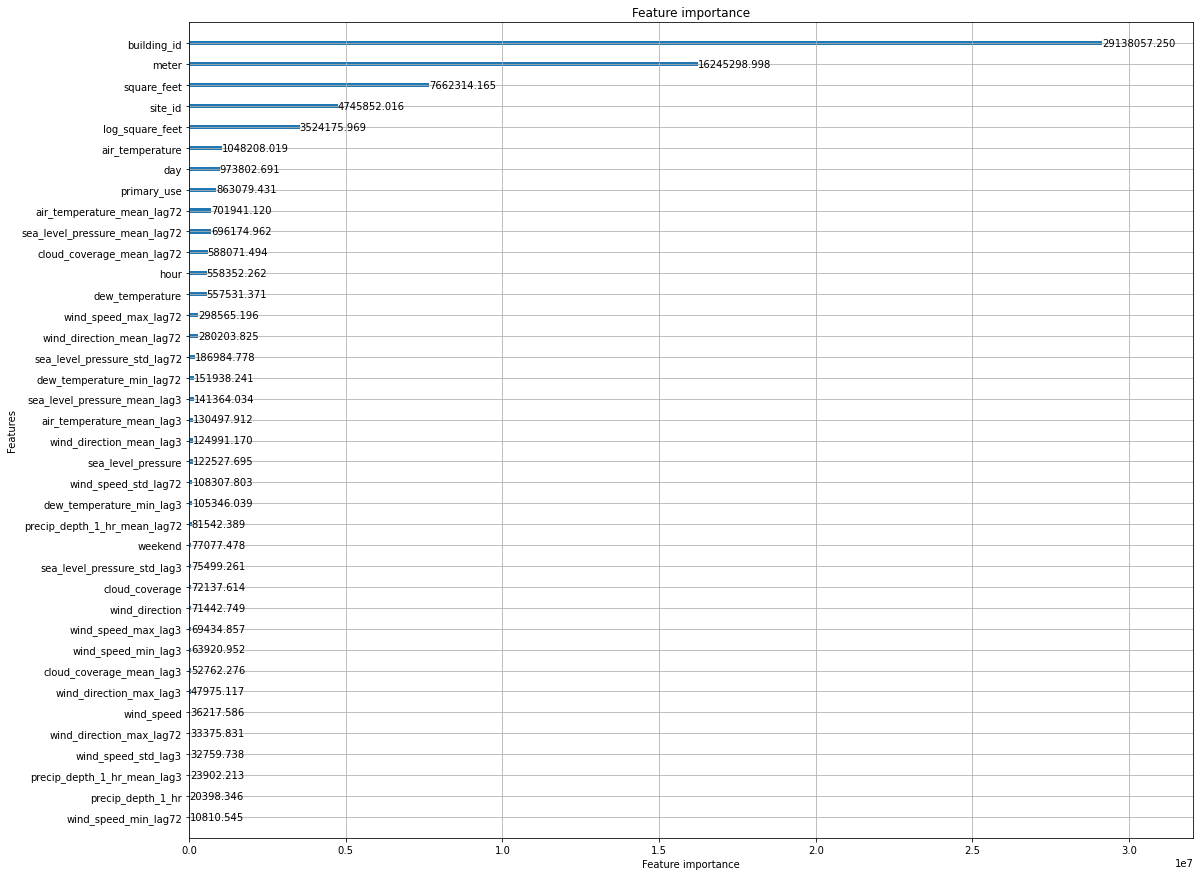

In [88]:
plt.rcParams['figure.figsize'] = (18,15)
lgbm.plot_importance(models[0], importance_type='gain')
plt.show()

By using feature importance attribute of the LBGM Model we get which feature contributed the most for the output.

The top 10 features that contributed the most for predictions are as follows - 

i) Building ID 

ii) Meter type 

iii) Area 

iv) Log of Area

v) Site ID

vi) Air Temperature 

vii) Day

Viii) Primary use

ix) sea level pressure mean lag 72

x) air temperature mean lag 72